In [11]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import os
import math

In [2]:
# Evaluate the norm of the difference between the two solutions
# at each time step
# Extract dimensions
def get_data(time, dataset):    
    n_members = dataset.dimensions["n_members"].size
    n_snapshots = dataset.dimensions["n_snapshots"].size
    x_size_and_boundary = dataset.dimensions["x_size_and_boundary"].size
    n_coupled_and_y_size_and_boundary = dataset.dimensions[
        "n_coupled_and_x_size_and_boundary"
    ].size
    n_coupled = dataset.getncattr("n_coupled")
    x_size = dataset.getncattr("x_length")
    y_size = dataset.getncattr("y_length")

    # Extract the data variable
    data = dataset.variables["data"][:]

    coupled_idx = 0
    return data[0, time, :, coupled_idx::n_coupled]

In [3]:
def get_steady_state(dataset):
    data = dataset.variables["data"][:]
    n_coupled = dataset.getncattr("n_coupled")


    steady_state = np.zeros_like(data[0, 0, :, :])
    steady_state[:, 0::n_coupled] = A
    steady_state[:, 1::n_coupled] = B / A
    return steady_state[:, 0::n_coupled]

In [9]:
def conv_plot(filename, id):
    d = nc.Dataset(filename, mode="r")
    steady_state = get_steady_state(d)
    n_snapshots = d.dimensions["n_snapshots"].size
    l1 = np.zeros((n_snapshots, 3))
    final_state = get_data(n_snapshots - 1, d)
    steady_state = get_steady_state(d)
    for t in range(n_snapshots):
        data = get_data(t, d)
        d_final = np.linalg.norm(data - final_state) / np.prod(data.shape)
        d_steady = np.linalg.norm(data - steady_state) / np.prod(data.shape)
        l1[t, 0] = t
        l1[t, 1] = d_final
        l1[t, 2] = d_steady

    # plt.plot(l1[:, 0], l1[:, 1], label=f"Final state ({id})")
    plt.plot(l1[:, 0], l1[:, 2], label=f"Steady state ({id})")
    plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1))


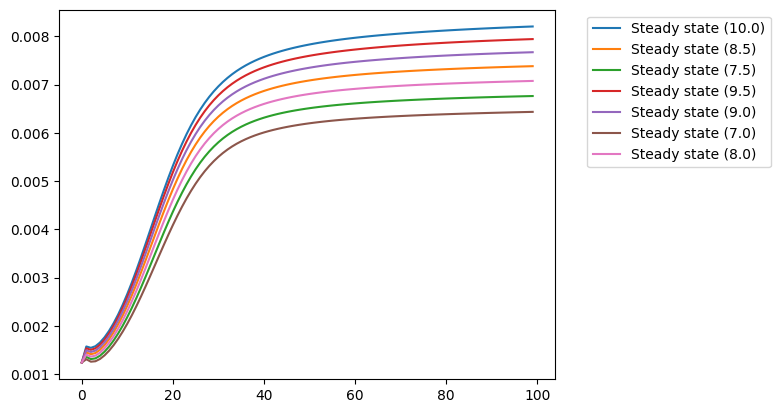

In [ ]:
# directory = "."
# for filename in os.listdir(directory):
#     if os.path.isfile(os.path.join(directory, filename)):
#         if filename.endswith("_output.nc"):
#             B = filename.split("_")[4]
#             B = float(B)
#             A = B * 5 / 9
#             # print(A)
#             conv_plot(filename, B)

In [ ]:
from scripts.final_frame import final_frame
directory = "."
for filename in os.listdir(directory):
    if os.path.isfile(os.path.join(directory, filename)):
        if filename.endswith("_output.nc"):
            final_frame(filename)
            plt.show()

SyntaxError: invalid syntax (2256633169.py, line 1)